In [2]:
# using a clique example
using MatrixNetworks
include("all_code/code_needed.jl")
include("all_code/methods.jl")
;

In [3]:
# triangle_density(A) = 3*(sum(Diagonal(A^3))/6)/((sum(A^2)-sum(Diagonal(A^2)))/2)
# equivalently,
# triangle_density(A) = sum(Diagonal(A^3))/(sum(A^2)-sum(Diagonal(A^2)))
function triangle_density(A)
    Am = A^2
    d = sum(Am)-sum(Diagonal(Am))
    Am = A*Am
    n = sum(Diagonal(Am))
    return n/d
end
A = [0 1 1
    1 0 1
    1 1 0]
@assert triangle_density(A) == 1

function tripartite_graph(n)
    ei = 1:n
    ej = n+1:2n
    ei = vcat(ei,n+1:2n)
    ej = vcat(ej,2n+1:3n)
    ei = vcat(ei,2n+1:3n)
    ej = vcat(ej,1:n)
    # make it connected:
    A = sparse(ei,ej,1,3n,3n)
    A = max.(A,A')
end
@show triangle_density(tripartite_graph(40))

triangle_density(tripartite_graph(40)) = 1.0


1.0

In [4]:
# union of cliques
A = Int.(load_matrix_network("clique-10"))
A = repeat(A,10,10)

####

tao = 0.8
Atrain,Atest = split_train_test(A,tao);
ei,ej,ev = findnz(triu(Atrain))
CAtrain = collapse_network(Atrain)
n = size(A,1)
myalpha = 0.8
t = 15.0

nbexps = 100
expids = sample_experiment_ids(nbexps,length(ei))
AUC = zeros(nbexps,11)
for curexp = 1:nbexps
    @show curexp
    i = expids[curexp]
    v1 = ei[i]
    v2 = ej[i]
    xd_hk,xs1_hk,xs2_hk = double_seed(Atrain,v1,v2,t,"hk")
    xd_pr,xs1_pr,xs2_pr = double_seed(Atrain,v1,v2,myalpha,"pr")
    xcollapse1_hk,xcollapse2_hk = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"hk",t)
    xcollapse1_pr,xcollapse2_pr = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"pr",myalpha)
    xalternate = pairseed_alternate(Atrain,v1,v2,myalpha,10)
    
    # ground truth solution
    tris = unzip_triangles(collect(triangles(A,v1)))
    ek1 = tris[3][findall(tris[2].==v2)]
    ek2 = tris[2][findall(tris[3].==v2)]
    xref = spzeros(n)
    if !isempty(ek1)
        xref[ek1] .= 1
    end
    if !isempty(ek2)
        xref[ek2] .= 1
    end
    
    tpr,fpr,auc = calc_AUC_new(xref,xd_hk); AUC[curexp,1] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_hk); AUC[curexp,2] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_hk); AUC[curexp,3] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xd_pr); AUC[curexp,4] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_pr); AUC[curexp,5] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_pr); AUC[curexp,6] = auc
    sum(xcollapse1_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_hk)[3]; AUC[curexp,7] = auc
    sum(xcollapse2_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_hk)[3]; AUC[curexp,8] = auc
    sum(xcollapse1_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_pr)[3]; AUC[curexp,9] = auc
    sum(xcollapse2_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_pr)[3]; AUC[curexp,10] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xalternate); AUC[curexp,11] = auc
end

@show triangle_density(A)

curexp = 1
curexp = 2
curexp = 3
curexp = 4
curexp = 5
curexp = 6
curexp = 7
curexp = 8
curexp = 9
curexp = 10
curexp = 11
curexp = 12
curexp = 13
curexp = 14
curexp = 15
curexp = 16
curexp = 17
curexp = 18
curexp = 19
curexp = 20
curexp = 21
curexp = 22
curexp = 23
curexp = 24
curexp = 25
curexp = 26
curexp = 27
curexp = 28
curexp = 29
curexp = 30
curexp = 31
curexp = 32
curexp = 33
curexp = 34
curexp = 35
curexp = 36
curexp = 37
curexp = 38
curexp = 39
curexp = 40
curexp = 41
curexp = 42
curexp = 43
curexp = 44
curexp = 45
curexp = 46
curexp = 47
curexp = 48
curexp = 49
curexp = 50
curexp = 51
curexp = 52
curexp = 53
curexp = 54
curexp = 55
curexp = 56
curexp = 57
curexp = 58
curexp = 59
curexp = 60
curexp = 61
curexp = 62
curexp = 63
curexp = 64
curexp = 65
curexp = 66
curexp = 67
curexp = 68
curexp = 69
curexp = 70
curexp = 71
curexp = 72
curexp = 73
curexp = 74
curexp = 75
curexp = 76
curexp = 77
curexp = 78
curexp = 79
curexp = 80
curexp = 81
curexp = 82
curexp = 83
curexp = 84
c

0.898876404494382

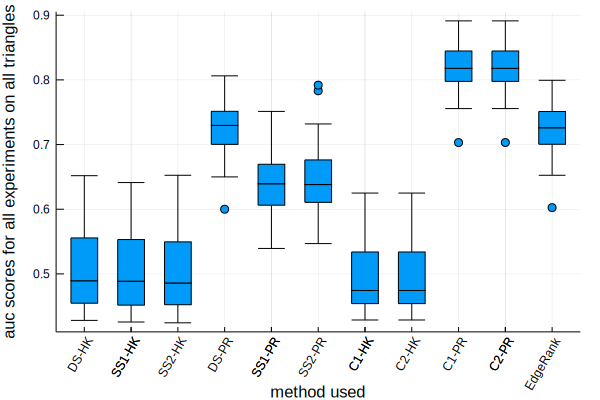

In [5]:
aucvals=AUC
boxplot(["DS-HK" "SS1-HK" "SS2-HK" "DS-PR" "SS1-PR" "SS2-PR" "C1-HK" "C2-HK" "C1-PR" "C2-PR" "EdgeRank"],aucvals, legend = false,color=1)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")
plot!(xrotation=60)

In [6]:
include("all_code/code_needed.jl")
include("all_code/methods.jl")
A = tripartite_graph(100)
####

tao = 0.8
Atrain,Atest = split_train_test(A,tao);
ei,ej,ev = findnz(triu(Atrain))
CAtrain = collapse_network(Atrain)
n = size(A,1)
myalpha = 0.8
t = 15.0

nbexps = 100
expids = sample_experiment_ids(nbexps,length(ei))
AUC = zeros(nbexps,11)
for curexp = 1:nbexps
    @show curexp
    i = expids[curexp]
    v1 = ei[i]
    v2 = ej[i]
    xd_hk,xs1_hk,xs2_hk = double_seed(Atrain,v1,v2,t,"hk")
    xd_pr,xs1_pr,xs2_pr = double_seed(Atrain,v1,v2,myalpha,"pr")
    xcollapse1_hk,xcollapse2_hk = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"hk",t)
    xcollapse1_pr,xcollapse2_pr = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"pr",myalpha)
    xalternate = pairseed_alternate(Atrain,v1,v2,myalpha,10)
    
    # ground truth solution
    tris = unzip_triangles(collect(triangles(A,v1)))
    ek1 = tris[3][findall(tris[2].==v2)]
    ek2 = tris[2][findall(tris[3].==v2)]
    xref = spzeros(n)
    if !isempty(ek1)
        xref[ek1] .= 1
    end
    if !isempty(ek2)
        xref[ek2] .= 1
    end
    
    tpr,fpr,auc = calc_AUC_new(xref,xd_hk); AUC[curexp,1] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_hk); AUC[curexp,2] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_hk); AUC[curexp,3] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xd_pr); AUC[curexp,4] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_pr); AUC[curexp,5] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_pr); AUC[curexp,6] = auc
    sum(xcollapse1_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_hk)[3]; AUC[curexp,7] = auc
    sum(xcollapse2_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_hk)[3]; AUC[curexp,8] = auc
    sum(xcollapse1_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_pr)[3]; AUC[curexp,9] = auc
    sum(xcollapse2_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_pr)[3]; AUC[curexp,10] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xalternate); AUC[curexp,11] = auc
end

@show triangle_density(A)

curexp = 1
curexp = 2
curexp = 3
curexp = 4
curexp = 5
curexp = 6
curexp = 7
curexp = 8
curexp = 9
curexp = 10
curexp = 11
curexp = 12
curexp = 13
curexp = 14
curexp = 15
curexp = 16
curexp = 17
curexp = 18
curexp = 19
curexp = 20
curexp = 21
curexp = 22
curexp = 23
curexp = 24
curexp = 25
curexp = 26
curexp = 27
curexp = 28
curexp = 29
curexp = 30
curexp = 31
curexp = 32
curexp = 33
curexp = 34
curexp = 35
curexp = 36
curexp = 37
curexp = 38
curexp = 39
curexp = 40
curexp = 41
curexp = 42
curexp = 43
curexp = 44
curexp = 45
curexp = 46
curexp = 47
curexp = 48
curexp = 49
curexp = 50
curexp = 51
curexp = 52
curexp = 53
curexp = 54
curexp = 55
curexp = 56
curexp = 57
curexp = 58
curexp = 59
curexp = 60
curexp = 61
curexp = 62
curexp = 63
curexp = 64
curexp = 65
curexp = 66
curexp = 67
curexp = 68
curexp = 69
curexp = 70
curexp = 71
curexp = 72
curexp = 73
curexp = 74
curexp = 75
curexp = 76
curexp = 77
curexp = 78
curexp = 79
curexp = 80
curexp = 81
curexp = 82
curexp = 83
curexp = 84
c

1.0

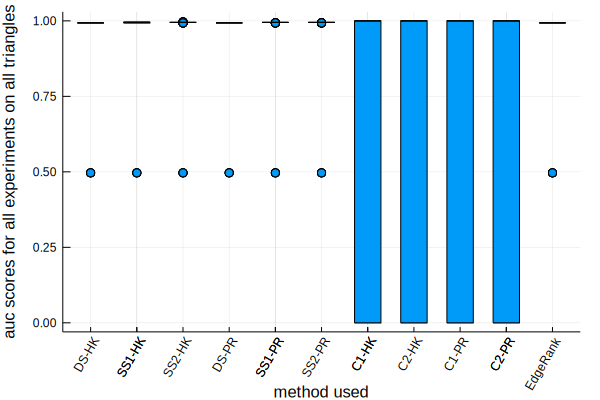

In [7]:
aucvals=AUC
boxplot(["DS-HK" "SS1-HK" "SS2-HK" "DS-PR" "SS1-PR" "SS2-PR" "C1-HK" "C2-HK" "C1-PR" "C2-PR" "EdgeRank"],aucvals, legend = false,color=1)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")
plot!(xrotation=60)

In [23]:
A = sparse(ones(Int,100,100))
A = A-Diagonal(A)

tao = 0.8
Atrain,Atest = split_train_test(A,tao);
ei,ej,ev = findnz(triu(Atrain))
CAtrain = collapse_network(Atrain)
n = size(A,1)
myalpha = 0.8
t = 15.0

nbexps = 100
expids = sample_experiment_ids(nbexps,length(ei))
AUC = zeros(nbexps,11)
for curexp = 1:nbexps
    @show curexp
    i = expids[curexp]
    v1 = ei[i]
    v2 = ej[i]
    xd_hk,xs1_hk,xs2_hk = double_seed(Atrain,v1,v2,t,"hk")
    xd_pr,xs1_pr,xs2_pr = double_seed(Atrain,v1,v2,myalpha,"pr")
    xcollapse1_hk,xcollapse2_hk = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"hk",t)
    xcollapse1_pr,xcollapse2_pr = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"pr",myalpha)
    xalternate = pairseed_alternate(Atrain,v1,v2,myalpha,10)
    
    # ground truth solution
    tris = unzip_triangles(collect(triangles(A,v1)))
    ek1 = tris[3][findall(tris[2].==v2)]
    ek2 = tris[2][findall(tris[3].==v2)]
    xref = spzeros(n)
    if !isempty(ek1)
        xref[ek1] .= 1
    end
    if !isempty(ek2)
        xref[ek2] .= 1
    end
    
    tpr,fpr,auc = calc_AUC_new(xref,xd_hk); AUC[curexp,1] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_hk); AUC[curexp,2] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_hk); AUC[curexp,3] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xd_pr); AUC[curexp,4] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_pr); AUC[curexp,5] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_pr); AUC[curexp,6] = auc
    sum(xcollapse1_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_hk)[3]; AUC[curexp,7] = auc
    sum(xcollapse2_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_hk)[3]; AUC[curexp,8] = auc
    sum(xcollapse1_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_pr)[3]; AUC[curexp,9] = auc
    sum(xcollapse2_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_pr)[3]; AUC[curexp,10] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xalternate); AUC[curexp,11] = auc
end

@show triangle_density(A)

curexp = 1
curexp = 2
curexp = 3
curexp = 4
curexp = 5
curexp = 6
curexp = 7
curexp = 8
curexp = 9
curexp = 10
curexp = 11
curexp = 12
curexp = 13
curexp = 14
curexp = 15
curexp = 16
curexp = 17
curexp = 18
curexp = 19
curexp = 20
curexp = 21
curexp = 22
curexp = 23
curexp = 24
curexp = 25
curexp = 26
curexp = 27
curexp = 28
curexp = 29
curexp = 30
curexp = 31
curexp = 32
curexp = 33
curexp = 34
curexp = 35
curexp = 36
curexp = 37
curexp = 38
curexp = 39
curexp = 40
curexp = 41
curexp = 42
curexp = 43
curexp = 44
curexp = 45
curexp = 46
curexp = 47
curexp = 48
curexp = 49
curexp = 50
curexp = 51
curexp = 52
curexp = 53
curexp = 54
curexp = 55
curexp = 56
curexp = 57
curexp = 58
curexp = 59
curexp = 60
curexp = 61
curexp = 62
curexp = 63
curexp = 64
curexp = 65
curexp = 66
curexp = 67
curexp = 68
curexp = 69
curexp = 70
curexp = 71
curexp = 72
curexp = 73
curexp = 74
curexp = 75
curexp = 76
curexp = 77
curexp = 78
curexp = 79
curexp = 80
curexp = 81
curexp = 82
curexp = 83
curexp = 84
c

1.0

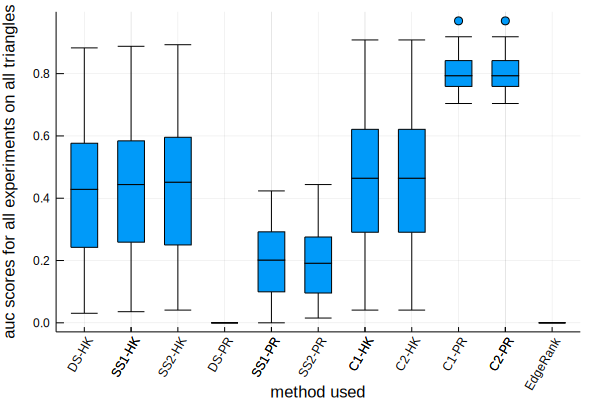

In [24]:
aucvals=AUC
boxplot(["DS-HK" "SS1-HK" "SS2-HK" "DS-PR" "SS1-PR" "SS2-PR" "C1-HK" "C2-HK" "C1-PR" "C2-PR" "EdgeRank"],aucvals, legend = false,color=1)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")
plot!(xrotation=60)

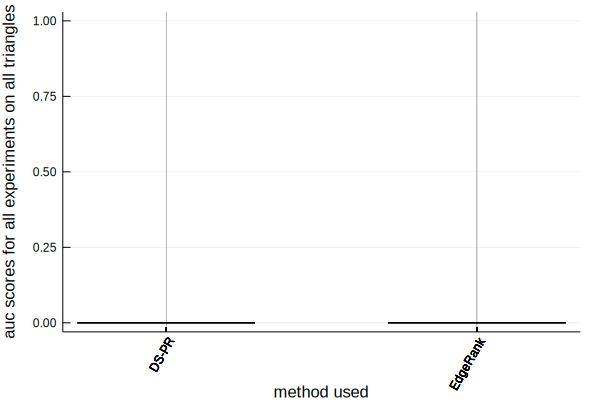

In [25]:
aucvals=AUC[:,[4,11]]
boxplot(["DS-PR" "EdgeRank"],aucvals, legend = false,color=1)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")
plot!(xrotation=60)

In [27]:
maximum(aucvals)

0.0

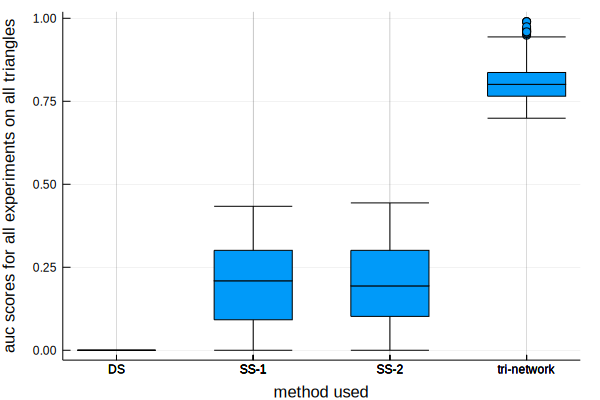

In [19]:
aucvals = hcat(AUC1,AUC2,AUC3,AUC4)
aucvals = aucvals
boxplot(["DS" "SS-1" "SS-2" "tri-network"],aucvals,leg=false,color=1)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")

In [14]:
AUC1

897-element Array{Any,1}:
 0.7551020408163265
 0.8061224489795918
 0.7704081632653061
 0.8775510204081632
 0.8418367346938775
 0.7244897959183674
 0.8673469387755102
 0.7448979591836735
 0.7857142857142857
 0.9183673469387755
 0.7653061224489797
 0.7602040816326531
 0.826530612244898 
 ⋮                 
 0.7653061224489797
 0.7653061224489796
 0.7959183673469388
 0.8163265306122449
 0.8010204081632653
 0.7448979591836735
 0.8775510204081632
 0.7551020408163265
 0.8724489795918366
 0.8316326530612245
 0.826530612244898 
 0.7653061224489796

In [29]:
xalternate = pairseed_alternate(Atrain,ei[expids[1]],ej[expids[1]],myalpha,10)

100-element Array{Float64,1}:
 0.009347822117310042 
 0.008779932002229188 
 0.008104044786384507 
 0.008246361035515404 
 0.008075680877402064 
 0.009199873612775758 
 0.008540466134283603 
 0.005849618579119992 
 0.008755965430447986 
 0.1075083489190119   
 0.007104818636920187 
 0.009426612394861023 
 0.008636904527622639 
 ⋮                    
 0.008481147791979886 
 0.009366251118308883 
 0.006532044983644768 
 0.009483483788257904 
 0.008670803733308734 
 0.00874014341482042  
 0.007532438867153374 
 0.008398618210299497 
 0.006958182784287929 
 0.0077415412558028505
 0.007144224541220817 
 0.008608367393593556 